In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Displaying a digit

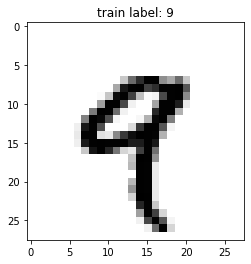

In [4]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.title(f'train label: {train_labels[4]}')
plt.show()

### Preparing the image data

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### Network Arcitecture

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(28*28,)),
    layers.Dense(10, activation='softmax')
])

### Compilation Step

In [7]:
model.compile(optimizer='rmsprop', 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Training Step

In [10]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3896 - accuracy: 0.8943
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1979 - accuracy: 0.9426
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1527 - accuracy: 0.9560
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9633
Epoch 5/5
469/469 [==============================] - ETA: 0s - loss: 0.1074 - accuracy: 0.96 - 1s 2ms/step - loss: 0.1070 - accuracy: 0.9688


### Evaluation Step

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc:.3f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9635
test_acc: 0.964
